# Project: Wrangle and Analyze Data

<hr>

# 1. Gathering Data 

In [1]:
# all librires
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load all dataset about tweet

twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
tweet_json=pd.read_json('tweet-json.txt',lines=True)




#### Load image prediction Programitcally

In [3]:
# loading the data of image prediction
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(data.content)

In [4]:
# read and check
image_data = pd.read_csv('image-predictions.tsv', sep='\t')
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 2. Assessing Data

#### just to remember 
**assess them visually and programmatically for quality and tidiness issues.**

- Detect and document at least eight (8) quality issues
- two (2) tidiness issues

In [5]:
# take a look of a sample of twitter_archive Dataframe
twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Wild Tuscan Poofwiggle. Careful not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702539513...,12,10,a,None,None,None,None
1537,689877686181715968,NaN,NaN,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689877686...,9,10,Durg,None,None,None,None
1763,678446151570427904,NaN,NaN,2015-12-20 05:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Touching scene here. Really stirs up the emoti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678446151...,10,10,None,None,None,None,None
1377,701601587219795968,NaN,NaN,2016-02-22 02:57:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coopson. He's a Blingin Schnitzel. Bui...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701601587...,10,10,Coopson,None,None,None,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
920,756303284449767430,NaN,NaN,2016-07-22 01:42:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pwease accept dis rose on behalf of dog. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756303284...,11,10,None,None,None,None,None
1695,681261549936340994,NaN,NaN,2015-12-27 23:53:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Panda. He's a Quackadilly Shooste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681261549...,9,10,Panda,None,None,None,None
1273,709207347839836162,NaN,NaN,2016-03-14 02:39:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709207347...,11,10,Penny,None,None,None,None
1832,676191832485810177,NaN,NaN,2015-12-14 00:07:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups just met and have instantly bon...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676191832...,10,10,None,None,None,None,None


In [6]:
# take a look to info of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
#describe
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
# take a look of a sample of image Dataframe

image_data.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
891,699370870310113280,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg,1,cairn,0.337557,True,Chihuahua,0.209130,True,Border_terrier,0.136946,True
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
1254,748324050481647620,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1,Shetland_sheepdog,0.880499,True,collie,0.107901,True,Pembroke,0.003607,True
719,685906723014619143,https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg,1,Yorkshire_terrier,0.414963,True,briard,0.063505,True,Pekinese,0.053682,True
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False
26,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True
1430,773191612633579521,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,Blenheim_spaniel,0.427766,True,Shih-Tzu,0.219256,True,Welsh_springer_spaniel,0.144614,True


In [9]:
# take a look to info of image_data
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
#show all columns
pd.set_option('display.max_columns', 500)

In [11]:
# take a look of a sample of tweet_json DataFrame

tweet_json.sample(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
385,2017-02-01 02:17:19+00:00,826615380357632002,826615380357632000,RT @dog_rates: Please only send in dogs. We on...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,4521,0,False,False,NaN,NaN,en,{'created_at': 'Sat Dec 17 00:38:52 +0000 2016...,NaN,NaN,NaN
561,2016-11-26 19:50:26+00:00,802600418706604034,802600418706604032,This is Bailey. She has mastered the head tilt...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1714,7938,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
771,2016-09-15 17:48:25+00:00,776477788987613185,776477788987613184,This is Huck. He's addicted to caffeine. Hope ...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776477764421582849, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3249,9858,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1054,2016-06-13 01:06:33+00:00,742161199639494656,742161199639494656,This is Doug. He's trying to float away. 12/10...,False,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 742161185223630852, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1547,4743,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1311,2016-03-07 18:09:06+00:00,706904523814649856,706904523814649856,Ever seen a dog pet another dog? Both 13/10 tr...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8830,15961,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1899,2015-12-09 17:46:48+00:00,674646392044941312,674646392044941312,Two gorgeous dogs here. Little waddling dog is...,False,"[0, 141]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674646386542043136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,557,1533,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1543,2016-01-19 03:32:10+00:00,689289219123089408,689289219123089408,Someone sent me this without any context and e...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689289176076959744, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1056,2476,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1904,2015-12-09 06:01:26+00:00,674468880899788800,674468880899788800,This is Louis. He thinks he's flying. 13/10 th...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674468873001938944, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2275,6676,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
469,2017-01-05 01:20:46+00:00,816816676327063552,816816676327063552,This is Timber. He misses Christmas. Specifica...,False,"[0, 91]","{'hashtags': [],

In [12]:
# take a look to info of tweet_json
tweet_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [13]:
#check the columen list 

list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [14]:
image_data.img_num.max(),image_data.img_num.min()

(4, 1)

In [15]:
#check the columen list 
list(image_data)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [16]:
# check describe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# check duplicated values row

image_data[image_data.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [18]:
# check the value counts row

twitter_archive.tweet_id.value_counts()

700151421916807169    1
674764817387900928    1
794926597468000259    1
701570477911896070    1
715220193576927233    1
                     ..
674742531037511680    1
756651752796094464    1
743545585370791937    1
770655142660169732    1
749075273010798592    1
Name: tweet_id, Length: 2356, dtype: int64

In [19]:
# check sum null 
sum(image_data.img_num.isnull())

0

In [20]:
((image_data['p1_dog'] == False)& (image_data['p2_dog'] == False) & (image_data['p3_dog'] == False)).sum()

324


## Quality Issue

`image_data` **table**

-   Wrong Datatype img_num Column should be in string
- in some cases all algorithms agreed that a tweet is not dog rating tweet.
- Dropping p1, p2, p3, p1_conf, p2_conf, p3_con, p1_dog, p2_dog and p3_dog

-

`twitter_archive` **table**

- There are more than one rating to the same tweet.
- Decimal point in (rating_numerator). 
-    Change tweet_id from an integer to a string .
-    Timestamp is not of datetime format .
- text have inconsistent format (lowercase and uppercase).
-  remove column retweeted_status_user_id , remove column retweeted_status_id ,remove column  retweeted_status_timestamp,remove column   in_reply_to_user_id,  remove column   in_reply_to_status_id
- rating_numerator and rating_denominator should merge to be rating_value as one columns after fix them wrong values and the type to float

- Clean invalid dog names like `a` ,`an` .. etc

- expanded_urls, using Excel to view the content found that there are many duplicate urls, currently do not know , i will check and i drop Duplicate

- remove id:862722525377298433 has no rating


`tweet_json` **table**

-     source mixed html tag
- Convert lang type to category datatype
- Change the name of the column id to tweet_id. The column (id) name does not match with the other datasets' tweet_id (problem when merging).





## Tidiness Issue

`twitter_archive` **table**
-  doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable Dog Type 
-  Date and time are combined in one column (TimeStamp).


`image_data` **table**

- Craete one column for the breed predictions and assign the values of the columns (p1, p2 and p3) to it. Then, delete p1, p2 and p3
-  Craete one column for the breed predictions confidence and assign the values of the columns (p1_conf, p2_conf and p3_conf) to it. Then, delete p1_conf, p2_conf and p3_conf.

`tweet_json` **table**

-  Date and time are combined in one column (Created_At).


**all table**
-   merge the dataframe twitter_archive, dataframe image_predictions, and tweet_json dataframes .



<hr>

# 3. Cleaning Data


In [21]:
# copies of all data to Cleaning process
twitter_archive_copy=twitter_archive.copy()
tweet_json_copy=tweet_json.copy()
image_data_copy=image_data.copy()

<hr>


## Quality Issue

`image_data` **table**

-   Wrong Datatype img_num Column should be in string
- in some cases all algorithms agreed that a tweet is not dog rating tweet.
- Dropping p1, p2, p3, p1_conf, p2_conf, p3_con, p1_dog, p2_dog and p3_dog

-

`twitter_archive` **table**

- There are more than one rating to the same tweet.
- Decimal point in (rating_numerator). 
-    Change tweet_id from an integer to a string .
-    Timestamp is not of datetime format .
- text have inconsistent format (lowercase and uppercase).
-  remove column retweeted_status_user_id , remove column retweeted_status_id ,remove column  retweeted_status_timestamp,remove column   in_reply_to_user_id,  remove column   in_reply_to_status_id
- rating_numerator and rating_denominator should merge to be rating_value as one columns after fix them wrong values and the type to float

- Clean invalid dog names like `a` ,`an` .. etc

- expanded_urls, using Excel to view the content found that there are many duplicate urls, currently do not know , i will check and i drop Duplicate

- remove id:862722525377298433 has no rating


`tweet_json` **table**

-     source mixed html tag
- Convert lang type to category datatype
- Change the name of the column id to tweet_id. The column (id) name does not match with the other datasets' tweet_id (problem when merging).





## Tidiness Issue

`twitter_archive` **table**
-  doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable Dog Type 
-  Date and time are combined in one column (TimeStamp).


`image_data` **table**

- Craete one column for the breed predictions and assign the values of the columns (p1, p2 and p3) to it. Then, delete p1, p2 and p3
-  Craete one column for the breed predictions confidence and assign the values of the columns (p1_conf, p2_conf and p3_conf) to it. Then, delete p1_conf, p2_conf and p3_conf.

`tweet_json` **table**

-  Date and time are combined in one column (Created_At).


**all table**
-   merge the dataframe twitter_archive, dataframe image_predictions, and tweet_json dataframes .



<hr>

### Define 

Displaying the tweet_ids that have more than one rating
 Correct the more than one rating to the same tweet condition.
Some tweets have more than one rating, hence the code picked the first one as the real rating while it maybe was a negative statement (not this but that).

### code

In [22]:
# Displaying the tweet_ids that have more than one rating
two_ratings = twitter_archive_copy['tweet_id'][twitter_archive_copy.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
two_ratings

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


[881633300179243008,
 835246439529840640,
 802624713319034886,
 777684233540206592,
 775096608509886464,
 763167063695355904,
 747600769478692864,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 714258258790387713,
 703356393781329922,
 695064344191721472,
 694352839993344000,
 691483041324204033,
 690400367696297985,
 689835978131935233,
 682962037429899265,
 677314812125323265,
 676191832485810177,
 674737130913071104,
 674646392044941312,
 673295268553605120,
 672248013293752320,
 671154572044468225,
 670434127938719744,
 669037058363662336,
 668537837512433665,
 667544320556335104,
 667491009379606528,
 667070482143944705,
 666835007768551424,
 666287406224695296]

In [23]:
# Excluding the valid ids
valid_ids=[747600769478692864, 714258258790387713, 703356393781329922, 695064344191721472, 694352839993344000, 691483041324204033, 690400367696297985, 689835978131935233, 677314812125323265, 676191832485810177, 674737130913071104, 674646392044941312, 673295268553605120, 672248013293752320, 671154572044468225, 670434127938719744, 669037058363662336, 668537837512433665, 667544320556335104, 667491009379606528, 667070482143944705, 666835007768551424]
for item in two_ratings[:]:
    for i in valid_ids:
        if item == i:
            two_ratings.remove(item)

In [24]:
print(len(two_ratings))
print(two_ratings)

11
[881633300179243008, 835246439529840640, 802624713319034886, 777684233540206592, 775096608509886464, 763167063695355904, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]


In [25]:
accurate_rating= twitter_archive_copy.query('(tweet_id==881633300179243008) or (tweet_id==835246439529840640) or (tweet_id==777684233540206592) or (tweet_id==740373189193256964) or (tweet_id==722974582966214656) or (tweet_id==716439118184652801) or (tweet_id==682962037429899265) or (tweet_id==666287406224695296)')['text']
accurate_rating

55      @roushfenway These are good dogs but 17/10 is ...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
766     "Yep... just as I suspected. You're not flossi...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1662    This is Darrel. He just robbed a 7/11 and is i...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

In [26]:
# Code 
for Text in accurate_rating:
    dec = twitter_archive_copy.text == Text
    numerator = 'rating_numerator'
    denominator = 'rating_denominator'
    twitter_archive_copy.loc[dec, numerator] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", Text)
    twitter_archive_copy.loc[dec, denominator] = 10

## test

In [27]:
#Test
twitter_archive_copy[twitter_archive_copy.text.isin(accurate_rating)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,11,10,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


<hr>

#### Define

Correct the decimal point in column (rating_numerator)
There are some numerator values that have decimal point in them, hence the code that has been used to extract the numerator from the tweets only took the numbers after the decimal point as the numerator.

### code

In [28]:
# Code
decimal_numerator = twitter_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_archive_copy['rating_numerator'] = decimal_numerator[0]
twitter_archive_copy['rating_numerator']= twitter_archive_copy['rating_numerator'].astype(float)

### test

In [29]:
# Test
twitter_archive_copy[twitter_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


<hr>

### define

Convert img_num  astype to (str )

### code

In [30]:
#Convert img_num astype to (str )

image_data_copy['img_num'] = image_data_copy['img_num'].astype(str)

### test

In [31]:
#test the data types for image data
image_data_copy.dtypes

tweet_id      int64
jpg_url      object
img_num      object
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

<hr>

### define

from twitter_archive table Change tweet_id column astype to string .

### code

In [32]:
#Change tweet_id column astype to string .
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

### test

In [33]:
# test the code
twitter_archive_copy.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

<hr>

### define

from twitter_archive table Change timestamp column to_datatime  .


### code

In [34]:
#from twitter_archive table convert timestamp column to_datatime .

twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'],format = "%Y-%m-%d ")

### test

In [35]:
#check the format of timestamp
twitter_archive_copy.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None


<hr>

### define

drop column retweeted_status_user_id in twitter_archive

### code

In [36]:
#drop column retweeted_status_user_id in twitter_archive

twitter_archive_copy = twitter_archive_copy.drop('retweeted_status_user_id',axis=1)

### test

In [37]:
#check the column retweeted_status_user_id is drop it ?
print(list(twitter_archive_copy))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


<hr>

### define

change the all text to be in str.lower()

### code

In [38]:
twitter_archive_copy['text'] = twitter_archive_copy['text'].str.lower()

### test

In [39]:
twitter_archive_copy['text'].head(2)

0    this is phineas. he's a mystical boy. only eve...
1    this is tilly. she's just checking pup on you....
Name: text, dtype: object

<hr>

### define

drop column retweeted_status_id in twitter_archive

### code

In [40]:
#drop column retweeted_status_id in twitter_archive

twitter_archive_copy = twitter_archive_copy.drop('retweeted_status_id',axis=1)

### test

In [41]:
#check the column retweeted_status_id is drop it ?
print(list(twitter_archive_copy))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


<hr>

### difne 

check duplicated i found in excel , and drop it here 

### code 

In [42]:
# how many duplicate have 
twitter_archive_copy['expanded_urls'].duplicated().sum()

137

In [43]:
# drop
twitter_archive_copy.drop_duplicates(subset ="expanded_urls",
                     keep = "first", inplace = True)

#### test

In [44]:
# should be 0
twitter_archive_copy['expanded_urls'].duplicated().sum()

0

<hr>

### Define 
remove id 862722525377298433 with mask trick 

### code 

In [45]:
#code 
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['tweet_id'] != '810984652412424192']

In [46]:
# test
twitter_archive_copy[twitter_archive_copy['tweet_id'] == '810984652412424192']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<hr>

### define

drop column retweeted_status_timestamp in twitter_archive

### code

In [47]:
#drop column retweeted_status_timestamp in twitter_archive

twitter_archive_copy = twitter_archive_copy.drop('retweeted_status_timestamp',axis=1)

### test

In [48]:
#check the column retweeted_status_timestamp is drop it ?
print(list(twitter_archive_copy))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


<hr>

### define

drop column in_reply_to_user_id in twitter_archive


### code

In [49]:
#drop column in_reply_to_user_id in twitter_archive

twitter_archive_copy = twitter_archive_copy.drop('in_reply_to_user_id',axis=1)

### test

In [50]:
#check the column in_reply_to_user_id is drop it ?
print(list(twitter_archive_copy))

['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


<hr>

### define

drop column in_reply_to_status_id in twitter_archive

### code

In [51]:
#drop column in_reply_to_status_id in twitter_archive

twitter_archive_copy = twitter_archive_copy.drop('in_reply_to_status_id',axis=1)

### test

In [52]:
#check the column in_reply_to_status_id is drop it ?
print(list(twitter_archive_copy))

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


<hr>

### define

 As the rating values is coorect as the guidness said, i will find the rating by dividing them and set on column for it:

### code

In [53]:
#As the rating values is coorect as the guidness said, i will find the rating by dividing them and set on column for it:

twitter_archive_copy['rating_numerator']= twitter_archive_copy['rating_numerator'].astype(float)
twitter_archive_copy['rating_denominator']= twitter_archive_copy['rating_denominator'].astype(float)
twitter_archive_copy['rating'] = twitter_archive_copy['rating_numerator']/twitter_archive_copy['rating_denominator']

In [54]:
## Delete rating_numerator and rating_denominator:
twitter_archive_copy.drop(['rating_numerator' , 'rating_denominator'], axis=1 , inplace=True)

### test

In [55]:
# test the data

twitter_archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3


<hr>

### define

Assign the values of the timestamp column to Date and time columns and delete the timestamp column.

### code

In [56]:
# Code: creating the columns
twitter_archive_copy['Date'] = twitter_archive_copy['timestamp'].apply(lambda date: date.strftime('%Y-%d-%m'))
twitter_archive_copy['Time'] = twitter_archive_copy['timestamp'].apply(lambda time: time.strftime('%H:%M:%S'))

### test

In [57]:
# Test
twitter_archive_copy[['timestamp','Date', 'Time']].head(10)

,timestamp,Date,Time
0,2017-08-01 16:23:56+00:00,2017-01-08,16:23:56
1,2017-08-01 00:17:27+00:00,2017-01-08,00:17:27
2,2017-07-31 00:18:03+00:00,2017-31-07,00:18:03
3,2017-07-30 15:58:51+00:00,2017-30-07,15:58:51
4,2017-07-29 16:00:24+00:00,2017-29-07,16:00:24
5,2017-07-29 00:08:17+00:00,2017-29-07,00:08:17
6,2017-07-28 16:27:12+00:00,2017-28-07,16:27:12
7,2017-07-28 00:22:40+00:00,2017-28-07,00:22:40
8,2017-07-27 16:25:51+00:00,2017-27-07,16:25:51
9,2017-07-26 15:59:51+00:00,2017-26-07,15:59:51


In [58]:
# Code: drop the timestamp column
twitter_archive_copy.drop('timestamp', axis= 1, inplace=True)

In [59]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2218 non-null   object 
 1   source         2218 non-null   object 
 2   text           2218 non-null   object 
 3   expanded_urls  2217 non-null   object 
 4   name           2218 non-null   object 
 5   doggo          2218 non-null   object 
 6   floofer        2218 non-null   object 
 7   pupper         2218 non-null   object 
 8   puppo          2218 non-null   object 
 9   rating         2218 non-null   float64
 10  Date           2218 non-null   object 
 11  Time           2218 non-null   object 
dtypes: float64(1), object(11)
memory usage: 225.3+ KB


<hr>

### dfine 
Date and time are combined in one column (Created_At).
i will creat date and time to spreate column and delete th Created_At

### code

In [60]:
# Code: creating the columns
tweet_json_copy['Date'] = tweet_json_copy['created_at'].apply(lambda date: date.strftime('%Y-%d-%m'))
tweet_json_copy['Time'] = tweet_json_copy['created_at'].apply(lambda time: time.strftime('%H:%M:%S'))

In [61]:
tweet_json_copy.drop('created_at',axis=1,inplace=True)

### test

In [62]:
# test
tweet_json_copy.head(1)

,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,Date,Time
0,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,2017-01-08,16:23:56


### define

if name is lowercase put the name 'None'

### code

In [63]:
# if name is lowercase put the name 'None'
twitter_archive_copy.name = twitter_archive_copy.name.map(lambda x: 'None' if x == x.lower() else x)

### test

In [64]:
#check the column name is edited 

twitter_archive_copy.name.sample(25)

1881       Laela
1106        None
2246     Tedrick
1199    Jennifur
1317        None
761      Stanley
2025      Batdog
1280     Malikai
1098        None
758         None
328       Bronte
2206        Zeek
620         None
1360        None
263       Winnie
1481       Sadie
818         None
1581      Samson
2044        None
1148       Blitz
18       Ralphus
657         None
740         None
2291     Churlie
2335        None
Name: name, dtype: object

<hr>


`tweet_json table`

 -   Convert lang type to category datatype


### define

use method str.extract to extract from user column the id number only without text such as id.. , id_str..

### code

In [65]:
#quick check only
tweet_json_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [66]:
# Python code to find the URL from an input string
# Using the regular expression
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 

tweet_json_copy.source = tweet_json_copy.source.str.extract(pattern)

### test

In [67]:
# test the data
tweet_json_copy.source.head(5)

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

<hr>

### define



Convert lang type to category datatype



### code

In [68]:
# convert lang to category
tweet_json_copy.lang = tweet_json_copy.lang.astype('category')

### test

In [69]:
# test the data 
tweet_json_copy.lang.dtypes

CategoricalDtype(categories=['en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'], ordered=False)

<hr>

## define

Change the name of the column id to tweet_id.
The column (id) name does not match with the other datasets' tweet_id (problem when merging).

## code

In [70]:
# Code
tweet_json_copy.rename(columns={"id": "tweet_id"}, inplace=True)

In [71]:
# convert to srting
tweet_json_copy['tweet_id'] = tweet_json_copy['tweet_id'].map(str)

In [72]:
# drop no nedeed col 
tweet_json_copy.drop('id_str',axis=1,inplace=True)

## test

In [73]:
# Test
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   tweet_id                       2354 non-null   object  
 1   full_text                      2354 non-null   object  
 2   truncated                      2354 non-null   bool    
 3   display_text_range             2354 non-null   object  
 4   entities                       2354 non-null   object  
 5   extended_entities              2073 non-null   object  
 6   source                         2354 non-null   object  
 7   in_reply_to_status_id          78 non-null     float64 
 8   in_reply_to_status_id_str      78 non-null     float64 
 9   in_reply_to_user_id            78 non-null     float64 
 10  in_reply_to_user_id_str        78 non-null     float64 
 11  in_reply_to_screen_name        78 non-null     object  
 12  user                           235

<hr>

In [74]:
#not nedeed i want clean it
tweet_json_copy = tweet_json_copy.drop(
    [ 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name'], axis=1)



In [75]:
#not nedeed i want clean it

columns = [ 'quoted_status', 'quoted_status_id', 'quoted_status_id_str' ,'retweeted_status']
tweet_json_copy = tweet_json_copy.drop(columns, axis=1)


In [76]:
#not nedeed i want clean it


columns = ['contributors', 'coordinates', 'geo', 'possibly_sensitive', 'possibly_sensitive_appealable', 'place', 'display_text_range', 'entities', 'truncated', 'user']
tweet_json_copy.drop(columns, axis=1, inplace=True)



In [77]:
tweet_json_copy.head(2)

,tweet_id,full_text,extended_entities,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,Date,Time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...",http://twitter.com/download/iphone,False,8853,39467,False,False,en,2017-01-08,16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...",http://twitter.com/download/iphone,False,6514,33819,False,False,en,2017-01-08,00:17:27


In [78]:
#not nedeed i want clean it
twitter_archive_copy.drop(['source'], axis=1)

,tweet_id,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,Date,Time
0,892420643555336193,this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3,2017-01-08,16:23:56
1,892177421306343426,this is tilly. she's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3,2017-01-08,00:17:27
2,891815181378084864,this is archie. he is a rare norwegian pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2,2017-31-07,00:18:03
3,891689557279858688,this is darla. she commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3,2017-30-07,15:58:51
4,891327558926688256,this is franklin. he would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2,2017-29-07,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,here we have a 1949 1st generation vulpix. enj...,https://twitter.com/dog_rates/status/666049248...,None,None,None,None,None,0.5,2015-16-11,00:24:50
2352,666044226329800704,this is a purebred piers morgan. loves to netf...,https://twitter.com/dog_rates/status/666044226...,None,None,None,None,None,0.6,2015-16-11,00:04:52
2353,666033412701032449,here is a very happy pup. big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,None,None,None,None,0.9,2015-15-11,23:21:54
2354,666029285002620928,this is a western brown mitsubishi terrier. up...,https://twitter.com/dog_rates/status/666029285...,None,None,None,None,None,0.7,2015-15-11,23:05:30


<hr>

### define

do mask to return only value is True is dog image tweet

### code

In [79]:
# assign new all p_dog to dataset without false is not dog
image_data_copy = image_data_copy[(image_data_copy['p1_dog'] == True) | (image_data_copy['p2_dog'] == True) 
                    | (image_data_copy['p3_dog'] == True) ]

### test

In [80]:
# test data , should be 0 
((image_data_copy['p1_dog'] == False) & (image_data_copy['p2_dog'] == False) & (image_data_copy['p3_dog'] == False)).sum()

0

<hr>

### dfine

1. Craete one column for the breed predictions and assign the values of the columns (p1, p2 and p3) to it. Then, delete p1, p2 and p3


### code 

In [81]:
# Function that extracts the first breed prediction
def BreedPrediction(p):
    if p['p1_dog']:
        return(p['p1'])
    elif p['p2_dog']:
        return(p['p2'])
    elif p['p3_dog']:
        return(p['p3'])
    else:
        return(np.NaN)

# Code
image_data_copy['breed_prediction'] = image_data_copy.apply (lambda p: BreedPrediction (p),axis=1)

## test 

In [82]:
# test
image_data_copy[['breed_prediction']].head(20)

,breed_prediction
0,Welsh_springer_spaniel
1,redbone
2,German_shepherd
3,Rhodesian_ridgeback
4,miniature_pinscher
5,Bernese_mountain_dog
7,chow
8,golden_retriever
9,miniature_poodle
10,golden_retriever


 ### define
 Craete one column for the breed predictions confidence and assign the values of the columns (p1_conf, p2_conf and p3_conf) to it. Then, delete p1_conf, p2_conf and p3_conf.

### code

In [83]:
# Function that extracts the first breed prediction confidence
def PredictionConfidence(pc):
    if pc['p1_dog']:
        return(pc['p1_conf'])
    elif pc['p2_dog']:
        return(pc['p2_conf'])
    elif pc['p3_dog']:
        return(pc['p3_conf'])
    else:
        return(np.NaN)
    
    
# Code
image_data_copy['prediction_confidence'] = image_data_copy.apply (lambda pc: PredictionConfidence(pc), axis= 1)

### test

In [84]:
# test
image_data_copy[['prediction_confidence']].head(20)

,prediction_confidence
0,0.465074
1,0.506826
2,0.596461
3,0.408143
4,0.560311
5,0.651137
7,0.692517
8,0.007959
9,0.201493
10,0.775930




  #### Dropping p1, p2, p3, p1_conf, p2_conf, p3_con, p1_dog, p2_dog and p3_dog:




## code

In [85]:
# Code
image_data_copy.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis= 1, inplace= True)

##### test

In [86]:
image_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1751 non-null   int64  
 1   jpg_url                1751 non-null   object 
 2   img_num                1751 non-null   object 
 3   breed_prediction       1751 non-null   object 
 4   prediction_confidence  1751 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.1+ KB


<hr>



### drop the tweets that are retweeted. 
for text have rt @

In [87]:
# fliter any row has value as retweeted or rt @ in text
twitter_archive_copy=twitter_archive_copy[~(twitter_archive_copy['text'].str.contains("rt @"))]


In [88]:
twitter_archive_copy.text.sample(40)

2007    this is kreg. he has the eyes of a tyrannical ...
315     when you're so blinded by your systematic plag...
2142    here we see really big dog cuddling smaller do...
647     your favorite squad is looking extra h*ckin sp...
1697    i just love this pic. 11/10 this pupper is goi...
954     this is fred. he's having one heck of a summer...
2104    this is phineas. he's a magical dog. only appe...
1220    here are two lil cuddly puppers. both 12/10 wo...
326     meet charlie. she asked u to change the channe...
2283    this is joshwa. he is a fuckboy supreme. he cl...
141     we only rate dogs. please don't send in jesus....
44      this is noah. he can't believe someone made th...
1682    say hello to charlie. he's scholarly af. quite...
939     so this just changed my life. 13/10 please enj...
981     this is finn. he's the most unphotogenic puppe...
50      this is stanley. he has his first swim lesson ...
850     this is brat. he has a hard time being ferocio...
1444    this i

<hr>

<hr>

In [89]:
# only quick check 
twitter_archive_copy.head(1)

,tweet_id,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,Date,Time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3,2017-01-08,16:23:56


### define

extract **[ doggo, floofer, pupper, puppo ]** from text these 4 variables and  combined into one categorical variable in Dog Type column

### code

In [90]:
# Extract the text from the columns into the new dog_type colunn
twitter_archive_copy['dog_type'] = twitter_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [91]:
# delete the type of dog cloumn 
twitter_archive_copy.drop(['doggo' , 'floofer','pupper','puppo'], axis=1 , inplace=True)

### test

In [92]:
# check value count in dog type column
twitter_archive_copy.dog_type.value_counts()

pupper     241
doggo       81
puppo       27
floofer      9
Name: dog_type, dtype: int64

<hr>

### define

using pyhton command pd.concat we can merge out datasets

### code

In [93]:
tweet = pd.merge(twitter_archive_copy, tweet_json_copy , on='tweet_id', how='left')


In [94]:
# merge all dataset outer join
wrangle_df2= pd.concat([tweet, image_data_copy], ignore_index=True)

### test

In [95]:
# test the new df merge
wrangle_df2.head(3)

,tweet_id,source_x,text,expanded_urls,name,rating,Date_x,Time_x,dog_type,full_text,extended_entities,source_y,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,Date_y,Time_y,jpg_url,img_num,breed_prediction,prediction_confidence
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,2017-01-08,16:23:56,NaN,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...",http://twitter.com/download/iphone,False,8853.0,39467.0,False,False,en,2017-01-08,16:23:56,NaN,NaN,NaN,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",this is tilly. she's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,2017-01-08,00:17:27,NaN,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...",http://twitter.com/download/iphone,False,6514.0,33819.0,False,False,en,2017-01-08,00:17:27,NaN,NaN,NaN,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",this is archie. he is a rare norwegian pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,2017-31-07,00:18:03,NaN,This is Archie. He is a rare Norwegian Pouncin...,"{'media': [{'id': 891815175371796480, 'id_str'...",http://twitter.com/download/iphone,False,4328.0,25461.0,False,False,en,2017-31-07,00:18:03,NaN,NaN,NaN,NaN


<hr>

# 4. Storing

In [96]:
# storing the dataset
wrangle_df2.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<hr>

# 5. Visualizating and Analyzing Data:

In [97]:
#load new data twitter_archive_master
df = pd.read_csv('twitter_archive_master.csv')

In [98]:
#check dataframe
df.head()

,tweet_id,source_x,text,expanded_urls,name,rating,Date_x,Time_x,dog_type,full_text,extended_entities,source_y,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,Date_y,Time_y,jpg_url,img_num,breed_prediction,prediction_confidence
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas. he's a mystical boy. only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,2017-01-08,16:23:56,NaN,This is Phineas. He's a mystical boy. Only eve...,"{'media': [{'id': 892420639486877696, 'id_str'...",http://twitter.com/download/iphone,False,8853.0,39467.0,False,False,en,2017-01-08,16:23:56,NaN,NaN,NaN,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",this is tilly. she's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,2017-01-08,00:17:27,NaN,This is Tilly. She's just checking pup on you....,"{'media': [{'id': 892177413194625024, 'id_str'...",http://twitter.com/download/iphone,False,6514.0,33819.0,False,False,en,2017-01-08,00:17:27,NaN,NaN,NaN,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",this is archie. he is a rare norwegian pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,2017-31-07,00:18:03,NaN,This is Archie. He is a rare Norwegian Pouncin...,"{'media': [{'id': 891815175371796480, 'id_str'...",http://twitter.com/download/iphone,False,4328.0,25461.0,False,False,en,2017-31-07,00:18:03,NaN,NaN,NaN,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",this is darla. she commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,2017-30-07,15:58:51,NaN,This is Darla. She commenced a snooze mid meal...,"{'media': [{'id': 891689552724799489, 'id_str'...",http://twitter.com/download/iphone,False,8964.0,42908.0,False,False,en,2017-30-07,15:58:51,NaN,NaN,NaN,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",this is franklin. he would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,2017-29-07,16:00:24,NaN,This is Franklin. He would like you to stop ca...,"{'media': [{'id': 891327551943041024, 'id_str'...",http://twitter.com/download/iphone,False,9774.0,41048.0,False,False,en,2017-29-07,16:00:24,NaN,NaN,NaN,NaN


# Insight 1

## - Plot on Count of Dog Types.

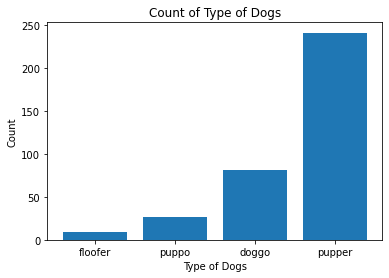

In [99]:
# plot the dog type with y-axis the count of dog and x-axis with name of value count
count=list(df['dog_type'].value_counts().sort_values())
label=list(df['dog_type'].value_counts().sort_values().index)

plt.bar(label,count);
plt.title("Count of Type of Dogs");
plt.xlabel("Type of Dogs");
plt.ylabel("Count");



#### Observation :

   we can clearly see that the most famous dog type is PUPPER followed by Doggo .



<hr>


# Insight 2
## - Plot of count of Image no.

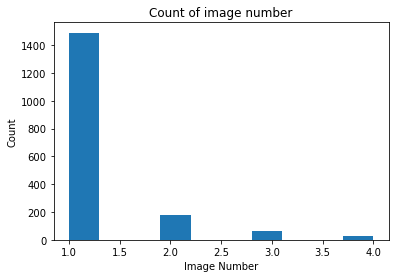

In [100]:
# plot the image number with y-axis the count of image number and x-axis with value count of image number

plt.hist(data =df , x='img_num')
plt.xlabel('Image Number')
plt.ylabel('Count')
plt.title('Count of image number');




#### Observation :

   clearly the Image Number 1 is the most frequent image .



<hr>

# Insight 3
## -  Which dog type have the highest average retweet and favorite-count?

In [101]:
# Retweet count
highest_retweet_count = (df.groupby(['dog_type']).mean()['retweet_count'])
highest_retweet_count.sort_values(ascending = False).head(10)

dog_type
puppo      7113.518519
doggo      5656.395062
floofer    4155.888889
pupper     2178.352697
Name: retweet_count, dtype: float64

In [102]:
# Favorite count
highest_retweet_count = (df.groupby(['dog_type']).mean()['favorite_count'])
highest_retweet_count.sort_values(ascending = False).head(10)

dog_type
puppo      23792.111111
doggo      16424.209877
floofer    11064.444444
pupper      6351.261411
Name: favorite_count, dtype: float64

#### Observation :

   On average the  most type have  retweeted  and favorites is pooupo dog type 
